In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('full_grouped.csv')
df2 = df.drop(['New deaths','New recovered','WHO Region'],axis=1)
df2

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases
0,2020-01-22,Afghanistan,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0
...,...,...,...,...,...,...,...
27297,2020-06-15,West Bank and Gaza,505,3,415,87,13
27298,2020-06-15,Western Sahara,9,1,8,0,0
27299,2020-06-15,Yemen,844,208,79,557,116
27300,2020-06-15,Zambia,1382,11,1142,229,24


In [3]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2.drop(['Date'],axis=1,inplace=True)
df2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Month,Day
0,Afghanistan,0,0,0,0,0,1,22
1,Albania,0,0,0,0,0,1,22
2,Algeria,0,0,0,0,0,1,22
3,Andorra,0,0,0,0,0,1,22
4,Angola,0,0,0,0,0,1,22
...,...,...,...,...,...,...,...,...
27297,West Bank and Gaza,505,3,415,87,13,6,15
27298,Western Sahara,9,1,8,0,0,6,15
27299,Yemen,844,208,79,557,116,6,15
27300,Zambia,1382,11,1142,229,24,6,15


In [4]:
X = df2.drop(['New cases'],axis=1)
Y = df2['New cases']
X['Country/Region'] = pd.factorize(X['Country/Region'])[0]
X,Y

(       Country/Region  Confirmed  Deaths  Recovered  Active  Month  Day
 0                   0          0       0          0       0      1   22
 1                   1          0       0          0       0      1   22
 2                   2          0       0          0       0      1   22
 3                   3          0       0          0       0      1   22
 4                   4          0       0          0       0      1   22
 ...               ...        ...     ...        ...     ...    ...  ...
 27297             182        505       3        415      87      6   15
 27298             183          9       1          8       0      6   15
 27299             184        844     208         79     557      6   15
 27300             185       1382      11       1142     229      6   15
 27301             186        387       4         54     329      6   15
 
 [27302 rows x 7 columns],
 0          0
 1          0
 2          0
 3          0
 4          0
         ... 
 27297     

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
import statsmodels.api as sm
X = np.append(arr = np.ones((27302,1)).astype(int), values=X,axis=1)

In [8]:
X

array([[   1,    0,    0, ...,    0,    1,   22],
       [   1,    1,    0, ...,    0,    1,   22],
       [   1,    2,    0, ...,    0,    1,   22],
       ...,
       [   1,  184,  844, ...,  557,    6,   15],
       [   1,  185, 1382, ...,  229,    6,   15],
       [   1,  186,  387, ...,  329,    6,   15]], dtype=int64)

In [9]:
X_opt = X[:,[0,1,2,3,4,5,6,7]]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              New cases   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     8543.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:            -2.2878e+05
No. Observations:               27302   AIC:                         4.576e+05
Df Residuals:                   27295   BIC:                         4.576e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.9136     26.172     -1.640      0.101     -94.212       8.385
x1             0.0249      0.119      0.210      0.834      -0.208       0.258
x2            -0.0205      0.001    -29.348      0.000      -0.022      -0.019
x3            -0.1071      0.002    -43.310      0.000      -0.112      -0.102
x4             0.0347      0.001     37.126      0.000       0.033       0.037
x5             0.0519      0.001     56.281      0.000       0.050       0.054
x6            36.2535      4.696      7.720      0.000      27.049      45.458
x7             1.5634      0.743      2.104      0.035       0.107       3.020
==============================================================================
Omnibus:                    42367.447   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59895627.986
Skew:                           9.484   Prob(JB):                         0.00
Kurtosis:                     231.674   Cond. No.                     2.33e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.09e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
X_opt = X[:,[0,2,3,4,5,6,7]]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              New cases   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:36:56   Log-Likelihood:            -2.2878e+05
No. Observations:               27302   AIC:                         4.576e+05
Df Residuals:                   27296   BIC:                         4.576e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.5858     23.712     -1.712      0.087     -87.062       5.890
x1            -0.0205      0.001    -29.348      0.000      -0.022      -0.019
x2            -0.1071      0.002    -43.311      0.000      -0.112      -0.102
x3             0.0347      0.001     37.131      0.000       0.033       0.037
x4             0.0519      0.001     56.285      0.000       0.050       0.054
x5            36.2501      4.696      7.719      0.000      27.046      45.455
x6             1.5632      0.743      2.104      0.035       0.107       3.020
==============================================================================
Omnibus:                    42366.698   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59894012.977
Skew:                           9.484   Prob(JB):                         0.00
Kurtosis:                     231.671   Cond. No.                     1.35e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
X_opt = X[:,[2,3,4,5,6,7]]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              New cases   R-squared (uncentered):                   0.662
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                          1.068e+04
Date:                Sat, 27 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:37:18   Log-Likelihood:                     -2.2879e+05
No. Observations:               27302   AIC:                                  4.576e+05
Df Residuals:                   27297   BIC:                                  4.576e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0204      0.001    -29.313      0.000      -0.022      -0.019
x2            -0.1071      0.002    -43.294      0.000      -0.112      -0.102
x3             0.0348      0.001     37.169      0.000       0.033       0.037
x4             0.0519      0.001     56.257      0.000       0.050       0.054
x5            29.5071      2.556     11.544      0.000      24.497      34.517
x6             0.6922      0.542      1.278      0.201      -0.369       1.754
==============================================================================
Omnibus:                    42364.498   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59905927.094
Skew:                           9.482   Prob(JB):                         0.00
Kurtosis:                     231.694   Cond. No.                     2.19e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
X_opt = X[:,[2,3,4,5,6]]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              New cases   R-squared (uncentered):                   0.662
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                          1.335e+04
Date:                Sat, 27 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:37:27   Log-Likelihood:                     -2.2879e+05
No. Observations:               27302   AIC:                                  4.576e+05
Df Residuals:                   27298   BIC:                                  4.576e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0204      0.001    -29.321      0.000      -0.022      -0.019
x2            -0.1071      0.002    -43.291      0.000      -0.112      -0.102
x3             0.0347      0.001     37.151      0.000       0.033       0.037
x4             0.0519      0.001     56.270      0.000       0.050       0.054
x5            31.9544      1.694     18.869      0.000      28.635      35.274
==============================================================================
Omnibus:                    42352.713   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59841500.023
Skew:                           9.477   Prob(JB):                         0.00
Kurtosis:                     231.571   Cond. No.                     8.51e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.8e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Now Training with new features

In [13]:
df = pd.read_csv('full_grouped.csv')
df2 = df.drop(['New deaths','New recovered','WHO Region','Country/Region'],axis=1)

In [14]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2.drop(['Date'],axis=1,inplace=True)

In [15]:
X = df2.drop(['New cases'],axis=1)
Y = df2['New cases']

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
regressor.score(X_test,Y_test)

0.6468481331586342

In [19]:
df2['Country/Region']=df['Country/Region']
df2['Country/Region'] = pd.factorize(df2['Country/Region'])[0]
dfindia = df2[df2['Country/Region']==79]
x_india = dfindia.drop(['New cases'],axis=1)
y_india = dfindia['New cases']
x_india.drop(['Country/Region'],axis=1,inplace=True)
y_pred_india = regressor.predict(x_india)
dataframe = pd.DataFrame({'Actual Value':y_india,'Predicted':y_pred_india})
dataframe

,Actual Value,Predicted
79,0,26.133863
266,0,26.133863
453,0,26.133863
640,0,26.133863
827,0,26.133863
...,...,...
26446,10930,5354.480483
26633,11458,5513.605483
26820,11929,5681.355483
27007,11502,5845.775762


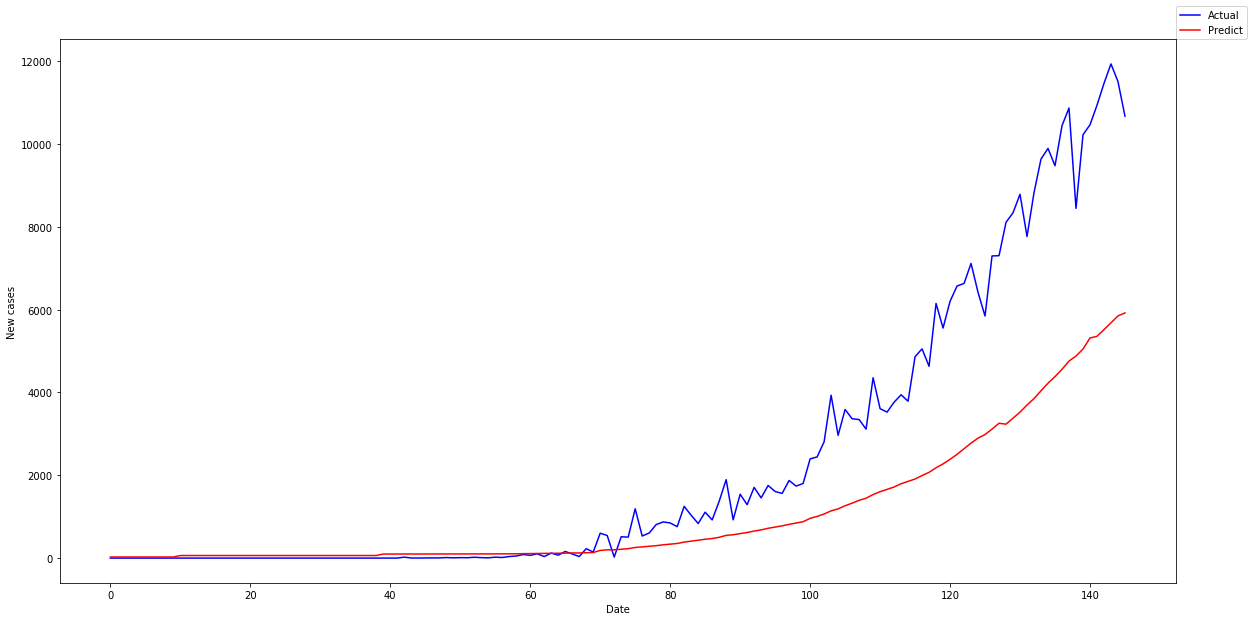

In [20]:
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));